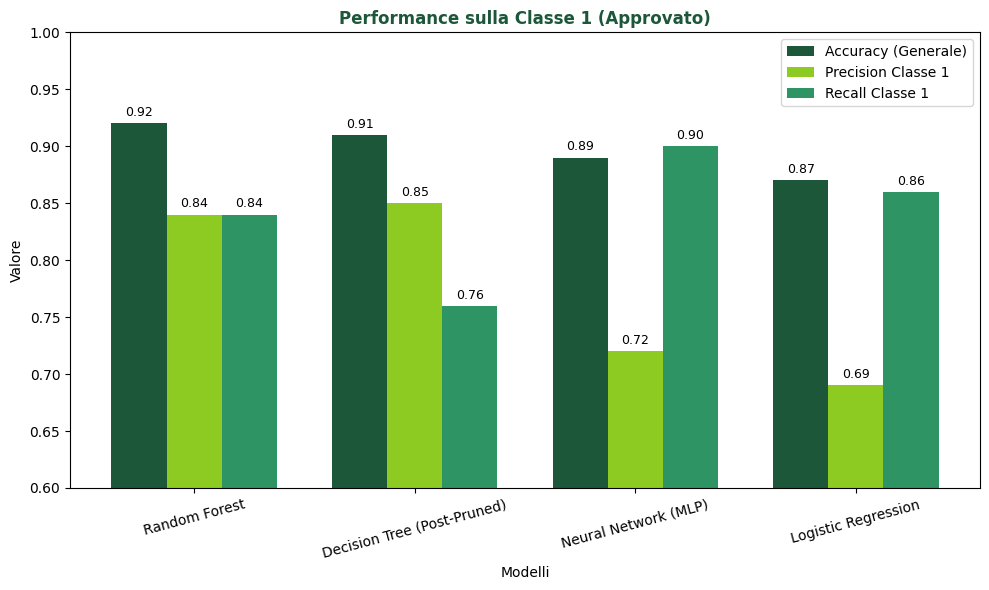

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Nomi modelli nel giusto ordine
modelli = ['Random Forest', 'Decision Tree (Post-Pruned)', 'Neural Network (MLP)', 'Logistic Regression']

# Valori da report (classe 1: Approvato / Concesso)
accuracy = [0.92, 0.91, 0.89, 0.87]
precision_1 = [0.84, 0.85, 0.72, 0.69]
recall_1 = [0.84, 0.76, 0.90, 0.86]

# Posizionamento delle barre
index = np.arange(len(modelli))
bar_width = 0.25

# Colori personalizzati
colore_accuracy = '#1c5739'   # Verde scuro
colore_precision = '#8dcb22'  # Verde chiaro
colore_recall = '#2e9463'     # Verde medio

# Creazione grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiunta barre
bars1 = ax.bar(index, accuracy, bar_width, label='Accuracy (Generale)', color=colore_accuracy)
bars2 = ax.bar(index + bar_width, precision_1, bar_width, label='Precision Classe 1', color=colore_precision)
bars3 = ax.bar(index + 2 * bar_width, recall_1, bar_width, label='Recall Classe 1', color=colore_recall)

# Etichette sopra ogni barra
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# Etichette assi e titolo
ax.set_xlabel('Modelli')
ax.set_ylabel('Valore')
ax.set_title('Performance sulla Classe 1 (Approvato)', color=colore_accuracy, weight='bold')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(modelli, rotation=15)
ax.set_ylim(0.60, 1.00)
ax.legend()

# Rimuovi griglia verticale e orizzontale
ax.grid(False, axis='x')
ax.grid(False, axis='y')

plt.tight_layout()
plt.show()
